In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import graphviz
from sklearn import tree

In [2]:
import pandas as pd

df = pd.read_csv('cannula_data.csv')

print(df)


    No.  Order No.  Article No.   Drawing  Bright Annealing  Sinking  \
0     1   14389927      15323759   360.40            107.40   385.60   
1     2   14389217      15325226   384.70            102.60   387.30   
2     3   14389820      15325218   391.10             99.20   375.60   
3     4   14388649      15325220   383.80            106.60   387.70   
4     5   14388570      15325218   392.60            115.00   396.80   
..  ...        ...           ...      ...               ...      ...   
95   96   14389722      15325221   377.44            177.72   390.23   
96   97   14389945      15325222   384.25            160.63   385.09   
97   98   14389828      15325221   418.41            188.91   413.28   
98   99   14389526      15325222   396.78            196.79   371.83   
99  100   14389578      15325221   347.26            189.11   345.72   

    Electro Fission  Distorted or Not  
0            387.70                 1  
1            390.70                 1  
2            39

In [3]:
df.drop(['No.','Order No.','Article No. '], axis=1, inplace=True)

In [4]:
print(df)

    Drawing  Bright Annealing  Sinking  Electro Fission  Distorted or Not
0    360.40            107.40   385.60           387.70                 1
1    384.70            102.60   387.30           390.70                 1
2    391.10             99.20   375.60           391.00                 1
3    383.80            106.60   387.70           394.10                 1
4    392.60            115.00   396.80           396.00                 1
..      ...               ...      ...              ...               ...
95   377.44            177.72   390.23           409.92                 0
96   384.25            160.63   385.09           382.29                 0
97   418.41            188.91   413.28           413.70                 0
98   396.78            196.79   371.83           371.05                 0
99   347.26            189.11   345.72           383.51                 0

[100 rows x 5 columns]


In [5]:
from tabulate import tabulate
import pandas as pd

feature_details = []

for column in df.columns:
    unique_values = df[column].nunique()
    dtype = df[column].dtype

    if dtype in ['int64', 'float64']:
        feature_type = 'Numerical'
        if unique_values == 2:
            feature_type = 'Binary (Numerical)'
    else:
        feature_type = 'Categorical'
        if unique_values == 2:
            feature_type = 'Binary (Categorical)'

    feature_details.append({'Feature': column, 'Type': feature_type, 'Unique Values': unique_values})

feature_table = pd.DataFrame(feature_details)

print(tabulate(feature_table, headers='keys', tablefmt='grid', showindex=False))

+------------------+--------------------+-----------------+
| Feature          | Type               |   Unique Values |
+==================+====================+=================+
| Drawing          | Numerical          |              98 |
+------------------+--------------------+-----------------+
| Bright Annealing | Numerical          |              99 |
+------------------+--------------------+-----------------+
| Sinking          | Numerical          |              97 |
+------------------+--------------------+-----------------+
| Electro Fission  | Numerical          |              91 |
+------------------+--------------------+-----------------+
| Distorted or Not | Binary (Numerical) |               2 |
+------------------+--------------------+-----------------+


In [6]:
from tabulate import tabulate

numerical_stats = df.describe().transpose()

print("\nNumerical Features Statistics:")
print(tabulate(numerical_stats, headers='keys', tablefmt='grid', showindex=True))

categorical_stats = []
for column in df.select_dtypes(include=['object', 'category']):
    categorical_stats.append({'Feature': column, 'Value Counts': df[column].value_counts().to_dict()})

categorical_table = pd.DataFrame(categorical_stats)

print("\nCategorical Features Statistics:")
print(tabulate(categorical_table, headers='keys', tablefmt='grid', showindex=False))



Numerical Features Statistics:
+------------------+---------+---------+-----------+-------+---------+---------+---------+--------+
|                  |   count |    mean |       std |   min |     25% |     50% |     75% |    max |
+==================+=========+=========+===========+=======+=========+=========+=========+========+
| Drawing          |     100 | 389.925 | 26.388    | 344.1 | 370.46  | 389.655 | 413.275 | 437.3  |
+------------------+---------+---------+-----------+-------+---------+---------+---------+--------+
| Bright Annealing |     100 | 133     | 32.62     |  90.3 | 104.225 | 116.8   | 161.787 | 196.79 |
+------------------+---------+---------+-----------+-------+---------+---------+---------+--------+
| Sinking          |     100 | 385.052 | 25.366    | 314.8 | 378.225 | 390.335 | 403.65  | 427.7  |
+------------------+---------+---------+-----------+-------+---------+---------+---------+--------+
| Electro Fission  |     100 | 395.998 | 15.3815   | 357.4 | 387.525

In [7]:
df.head()

,Drawing,Bright Annealing,Sinking,Electro Fission,Distorted or Not
0,360.4,107.4,385.6,387.7,1
1,384.7,102.6,387.3,390.7,1
2,391.1,99.2,375.6,391.0,1
3,383.8,106.6,387.7,394.1,1
4,392.6,115.0,396.8,396.0,1


In [8]:
value_counts = df['Distorted or Not'].value_counts()
value_counts

,count
Distorted or Not,
1,50
0,50


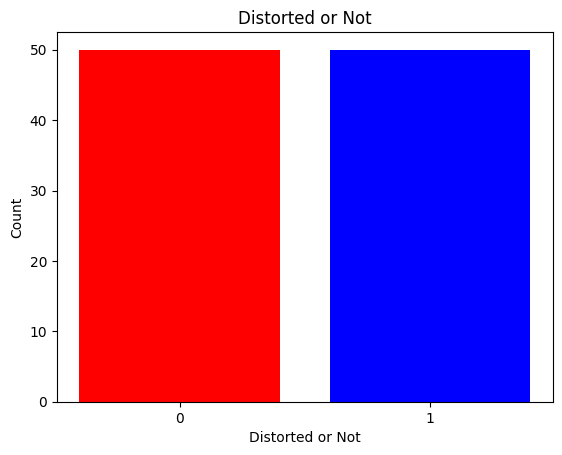

In [9]:
plt.bar(value_counts.index, value_counts.values, color=['blue', 'red'])
plt.xticks(value_counts.index)
plt.xlabel('Distorted or Not')
plt.ylabel('Count')
plt.title('Distorted or Not')
plt.show()

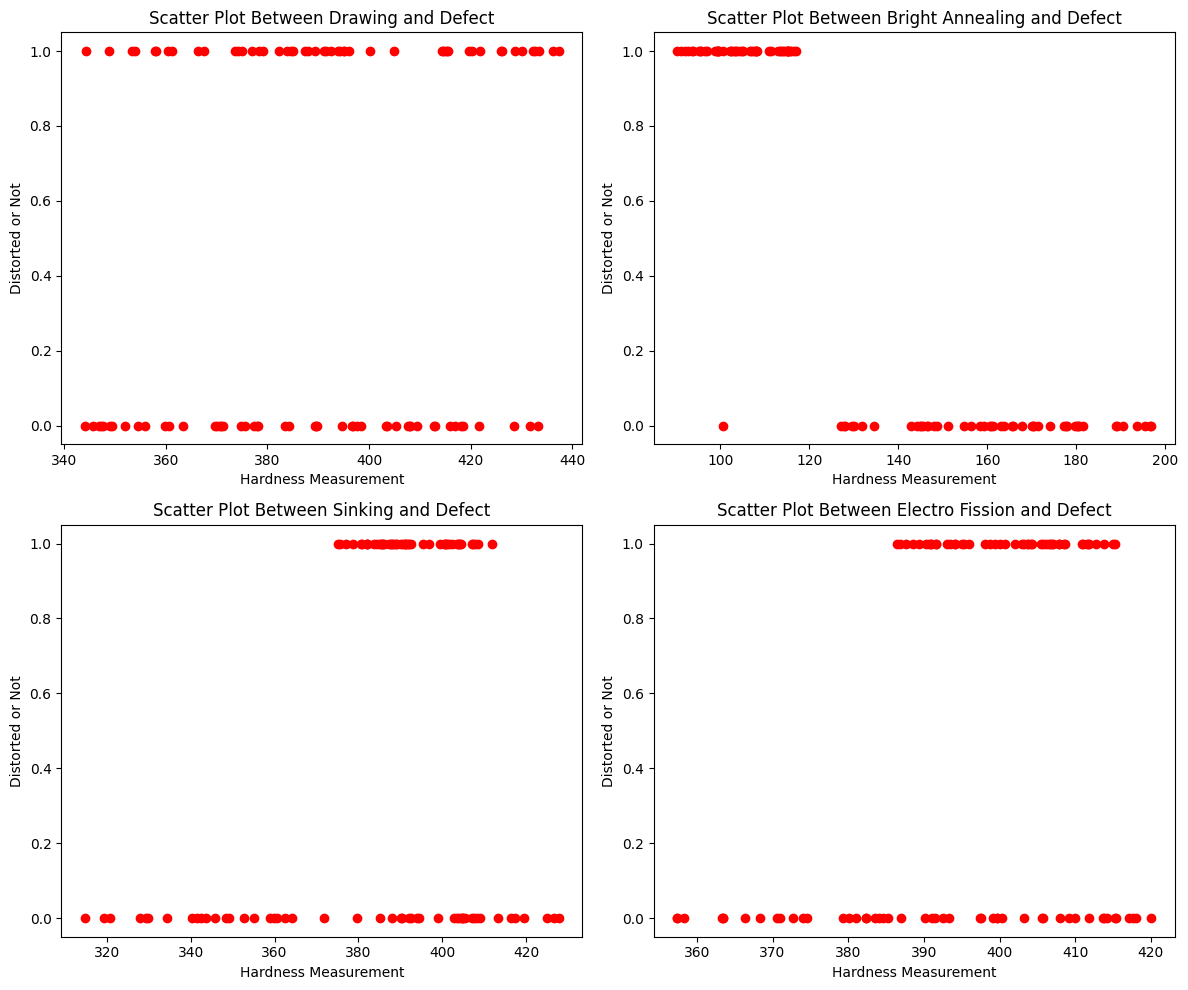

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].scatter(df['Drawing'], df['Distorted or Not'], color='red')
axes[0, 0].set_title("Scatter Plot Between Drawing and Defect")

axes[0, 1].scatter(df['Bright Annealing'], df['Distorted or Not'], color='red')
axes[0, 1].set_title("Scatter Plot Between Bright Annealing and Defect")

axes[1, 0].scatter(df['Sinking'], df['Distorted or Not'], color='red')
axes[1, 0].set_title("Scatter Plot Between Sinking and Defect")

axes[1, 1].scatter(df['Electro Fission'], df['Distorted or Not'], color='red')
axes[1, 1].set_title("Scatter Plot Between Electro Fission and Defect")

for ax in axes.flat:
    ax.set_xlabel("Hardness Measurement")
    ax.set_ylabel("Distorted or Not")

plt.tight_layout()

plt.show()

In [11]:
df.isnull().sum()

,0
Drawing,0
Bright Annealing,0
Sinking,0
Electro Fission,0
Distorted or Not,0


In [12]:
X = df.drop(['Distorted or Not'], axis=1)

y = df['Distorted or Not']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
X_train.shape, X_test.shape

((70, 4), (30, 4))

## **Decision Tree Classifier Algorithm**

In [15]:
clf = DecisionTreeClassifier(random_state=42)

In [16]:
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [None, 10, 20, 30, 40],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

In [17]:
grid_search_clf = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [18]:
grid_search_clf.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [19]:
print('Best Parameters:', grid_search_clf.best_params_)
print('Best Score:', grid_search_clf.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best Score: 0.9857142857142858


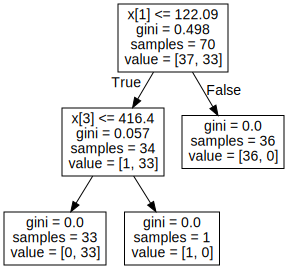

In [20]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, feature_names=None)
graph = graphviz.Source(dot_data)
graph

In [21]:
feature_names = ['Drawing', 'Bright Annealing', 'Sinking', 'Electro Fission']
feature_importances = clf.feature_importances_
feature_importances = pd.Series(clf.feature_importances_, index=feature_names)
feature_data = list(zip(feature_names, feature_importances))
print(tabulate(feature_data, headers=['Feature', 'Importance'], tablefmt='grid'))

+------------------+--------------+
| Feature          |   Importance |
+==================+==============+
| Drawing          |    0         |
+------------------+--------------+
| Bright Annealing |    0.944356  |
+------------------+--------------+
| Sinking          |    0         |
+------------------+--------------+
| Electro Fission  |    0.0556439 |
+------------------+--------------+


In [54]:
grid_search_clf.fit(X_train, y_train)

best_model_clf = grid_search_clf.best_estimator_

y_pred = best_model_clf.predict(X)

print("\nAccuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))
print("\nROC AUC Score:", roc_auc_score(y, y_pred))

Fitting 5 folds for each of 180 candidates, totalling 900 fits

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


ROC AUC Score: 1.0


## **Random Forest Algorithm**

In [24]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)


print(f"Best Parameters:", grid_search_rf.best_params_)
print(f"Best Cross-validation Accuracy:", grid_search_rf.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Accuracy: 0.9857142857142858


In [28]:
best_rf = grid_search_rf.best_estimator_

feature_importances_rf = best_rf.feature_importances_

feature_importances_rf_series = pd.Series(feature_importances_rf, index=feature_names_rf)

feature_data_rf = list(zip(feature_names_rf, feature_importances_rf_series))
print(tabulate(feature_data_rf, headers=['Feature', 'Importance'], tablefmt='grid'))


+------------------+--------------+
| Feature          |   Importance |
+==================+==============+
| Drawing          |    0.0149925 |
+------------------+--------------+
| Bright Annealing |    0.76952   |
+------------------+--------------+
| Sinking          |    0.121739  |
+------------------+--------------+
| Electro Fission  |    0.0937482 |
+------------------+--------------+


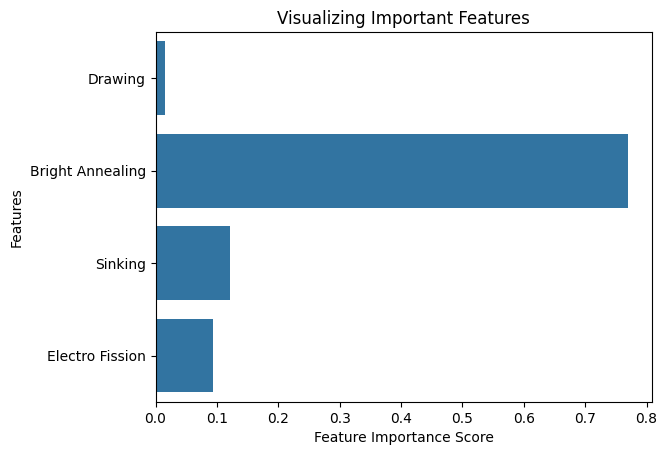

In [30]:
sns.barplot(x=feature_importances_rf_series, y=feature_importances_rf_series.index)

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.show()

In [55]:
grid_search_rf.fit(X_train, y_train)

best_model_rf = grid_search_rf.best_estimator_

y_pred = best_model_rf.predict(X)

print("\nAccuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))
print("\nROC AUC Score:", roc_auc_score(y, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


ROC AUC Score: 1.0


## **K-Nearest Neighbor (KNN)** **Algorithm**

In [31]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [50]:
param_grid = {'n_neighbors': list(range(1, 31))}

grid_search_KNN = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1')
grid_search_KNN.fit(X_train, y_train)

print(f"Best Parameters: {grid_search_KNN.best_params_}")
print(f"Best F1 Score: {grid_search_KNN.best_score_:.4f}")

Best Parameters: {'n_neighbors': 4}
Best F1 Score: 0.9733


In [53]:
grid_search_KNN.fit(X_train, y_train)

best_model_KNN = grid_search_KNN.best_estimator_

y_pred = best_model_KNN.predict(X)

print("\nAccuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))
print("\nROC AUC Score:", roc_auc_score(y, y_pred))


Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.96      1.00      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100


ROC AUC Score: 0.98


## **Logistic Regression Algorithm**

In [40]:
lr = LogisticRegression(random_state=42, max_iter=5000)

param_grid = [
    {
        'C': [0.01,0.1,1,10,100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear'],
        'class_weight':[None, 'balanced']
    },
    {
        'C': [0.01,0.1,1,10,100],
        'penalty': ['l1', 'l2','elasticnet'],
        'solver': ['saga'],
        'l1_ratio': [0.1, 0.5, 0.9],
        'class_weight':[None, 'balanced']
    }
]

grid_search_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    error_score='raise'
)

grid_search_lr.fit(X_train, y_train)


print(f"Best Parameters:", grid_search_lr.best_params_)
print(f"Best Cross- Validation Accuracy Score:", grid_search_lr.best_score_)

Fitting 5 folds for each of 110 candidates, totalling 550 fits
Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross- Validation Accuracy Score: 0.9857142857142858


In [43]:
best_lr = grid_search_lr.best_estimator_

feature_coefficients = best_lr.coef_

feature_coefficients = feature_coefficients.flatten()

feature_importances_lr_series = pd.Series(feature_coefficients, index=feature_names_rf)

feature_data_lr = list(zip(feature_names_rf, feature_importances_lr_series))
print(tabulate(feature_data_lr, headers=['Feature', 'Coefficient'], tablefmt='grid'))


+------------------+---------------+
| Feature          |   Coefficient |
+==================+===============+
| Drawing          |    0.00134581 |
+------------------+---------------+
| Bright Annealing |   -0.177213   |
+------------------+---------------+
| Sinking          |    0          |
+------------------+---------------+
| Electro Fission  |    0.0526047  |
+------------------+---------------+


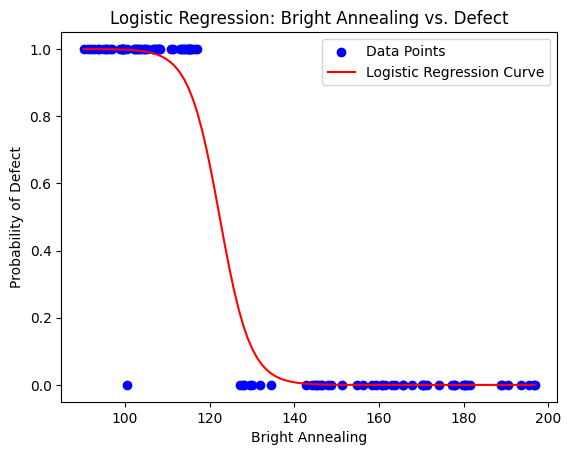

In [57]:
x = df[['Bright Annealing']].values
y = df['Distorted or Not'].values

model = LogisticRegression()
model.fit(x, y)

plt.scatter(x, y, color='blue', label='Data Points')

X_curve = np.linspace(min(x), max(x), 100).reshape(-1, 1)
Y_curve = model.predict_proba(X_curve)[:, 1]

plt.plot(X_curve, Y_curve, color='red', label='Logistic Regression Curve')
plt.xlabel('Bright Annealing')
plt.ylabel('Probability of Defect')
plt.legend()
plt.title('Logistic Regression: Bright Annealing vs. Defect')
plt.show()

In [56]:
grid_search_lr.fit(X_train, y_train)

best_model_lr = grid_search_lr.best_estimator_

y_pred = best_model_lr.predict(X)

print("\nAccuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))
print("\nROC AUC Score:", roc_auc_score(y, y_pred))

Fitting 5 folds for each of 110 candidates, totalling 550 fits

Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100


ROC AUC Score: 0.99


In [59]:
input_data = (394.7,112.7,403.4,410.8)

y_prediction = best_model_rf.predict([input_data])

if y_prediction[0] == 0:
    print("The cannula is not distorted.")
else:
    print("The cannula is distorted.")

The cannula is distorted.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [60]:
import pickle

In [62]:
filename = 'model_prediction_rf.pkl'
pickle.dump(best_model_rf,open(filename,'wb'))